In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import seaborn as sns; sns.set()
from matplotlib import dates
import altair as alt
import math
from matplotlib import dates
from astropy.time import Time

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
plt.style.use('seaborn-dark-palette')

In [3]:
jedicdaw = pd.read_csv('jedicdaw_time_position_match.csv', low_memory=False)
#read in the jedicdaw csv made by James Mason, if you want it you can find it on his github.

In [4]:
jedicdaw

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,GOES Latitude,GOES Longitude,GOES Converted Position Angle [º],Pre-Flare Start Time,Pre-Flare End Time,Flare Interrupt,...,103.2 by 83.6 Fitting Score,103.2 by 95.0 Fitting Score,103.2 by 97.3 Fitting Score,103.2 by 97.7 Fitting Score,103.2 by 102.6 Fitting Score,Has CME,Matching CME time to time of,CME Time,CME Speed [km/s],CME Mass [g]
0,1.0,2010-05-04 16:15:00.000,2010-05-04 16:29:00.000,C3.6,41.0,23.0,330.708637,2010-05-04 08:29:00.000,2010-05-04 16:29:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN
1,2.0,2010-05-05 07:09:00.000,2010-05-05 07:16:00.000,C2.3,NaN,NaN,NaN,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN
2,3.0,2010-05-05 11:37:00.000,2010-05-05 11:52:00.000,C8.8,NaN,NaN,NaN,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN
3,4.0,2010-05-05 17:13:00.000,2010-05-05 17:19:00.000,M1.2,42.0,37.0,318.621484,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,False,...,NaN,NaN,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN
4,5.0,2010-05-07 07:29:00.000,2010-05-07 07:42:00.000,C2.0,40.0,54.0,306.528854,2010-05-06 23:42:00.000,2010-05-07 07:42:00.000,True,...,NaN,NaN,NaN,NaN,NaN,2,Dimming,2010-05-07 08:06:05.000,543.0,5.000000e+14
5,6.0,2010-05-08 04:51:00.000,2010-05-08 04:59:00.000,C9.3,38.0,65.0,300.311212,2010-05-07 20:59:00.000,2010-05-08 04:59:00.000,True,...,NaN,NaN,NaN,0.329834,0.073395,True,Dimming,2010-05-08 05:30:06.000,622.0,9.600000e+14
6,7.0,2010-05-08 11:40:00.000,2010-05-08 11:50:00.000,C1.8,NaN,NaN,NaN,2010-05-07 20:59:00.000,2010-05-08 04:59:00.000,True,...,NaN,NaN,NaN,0.126622,NaN,False,Dimming,NaN,NaN,NaN
7,9.0,2010-06-12 00:30:00.000,2010-06-12 00:57:00.000,M2.0,23.0,43.0,298.141600,2010-06-11 16:57:00.000,2010-06-12 00:57:00.000,True,...,NaN,NaN,NaN,NaN,NaN,2,Dimming,2010-06-12 01:31:39.000,486.0,2.100000e+15
8,10.0,2010-06-12 03:57:00.000,2010-06-12 04:06:00.000,C1.0,NaN,NaN,NaN,2010-06-11 16:57:00.000,2010-06-12 00:57:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN
9,11.0,2010-06-12 09:02:00.000,2010-06-12 09:17:00.000,C6.1,22.0,52.0,292.932099,2010-06-11 16:57:00.000,2010-06-12 00:57:00.000,True,...,NaN,NaN,NaN,NaN,NaN,2,Dimming,2010-06-12 09:54:57.000,382.0,6.500000e+14


In [5]:
jedicdaw_copy = jedicdaw.copy()

In [6]:
jedicdaw_sub = jedicdaw[['19.5 Depth [%]', '17.1 Depth [%]', '30.4 Depth [%]', '21.1 Depth [%]', '17.1 Depth Time',
                         '19.5 Depth Time', '30.4 Depth Time', '21.1 Depth Time']]

In [7]:
def index_of_nans(values):
    """returns an array that contains the indices of when the elements equal nan, must pass it a 2d numpy array"""
    useless_euvs = []
    for index, elem in enumerate(values):
        if math.isnan(elem):
            useless_euvs.append(index)
    
    return useless_euvs

In [8]:
ind_of_empty_events = index_of_nans(jedicdaw_sub.T.describe().values[1])

In [9]:
event_num = jedicdaw.filter(regex='Event #')
GOES_data = jedicdaw.filter(regex='GOES ')
pre_flare_start = jedicdaw.filter(regex='Pre-Flare Start Time')
pre_flare_end = jedicdaw.filter(regex='Pre-Flare End Time')
flare_interrupt = jedicdaw.filter(regex='Flare Interrupt')
has_CME = jedicdaw.filter(regex='Has CME')
matching_CME_time = jedicdaw.filter(regex='Matching CME time to time of')
cme_data = jedicdaw.filter(regex='CME ')

In [10]:
useless_event_nums = []
for i in range(len(ind_of_empty_events)):
    for k in range(len(jedicdaw_sub)):
        if ind_of_empty_events[i] == k:
            useless_event_nums.append(event_num.values[k])

In [11]:
frames = [event_num, GOES_data, pre_flare_start, pre_flare_end, flare_interrupt,
          jedicdaw_sub, has_CME, cme_data]
jedicdaw_sub_v2 = pd.concat(frames, axis=1)

In [12]:
jedicdaw_sub_v2

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,GOES Latitude,GOES Longitude,GOES Converted Position Angle [º],Pre-Flare Start Time,Pre-Flare End Time,Flare Interrupt,...,21.1 Depth [%],17.1 Depth Time,19.5 Depth Time,30.4 Depth Time,21.1 Depth Time,Has CME,Matching CME time to time of,CME Time,CME Speed [km/s],CME Mass [g]
0,1.0,2010-05-04 16:15:00.000,2010-05-04 16:29:00.000,C3.6,41.0,23.0,330.708637,2010-05-04 08:29:00.000,2010-05-04 16:29:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN
1,2.0,2010-05-05 07:09:00.000,2010-05-05 07:16:00.000,C2.3,NaN,NaN,NaN,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN
2,3.0,2010-05-05 11:37:00.000,2010-05-05 11:52:00.000,C8.8,NaN,NaN,NaN,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN
3,4.0,2010-05-05 17:13:00.000,2010-05-05 17:19:00.000,M1.2,42.0,37.0,318.621484,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,False,...,NaN,NaN,NaN,2010-05-06 09:13:11,NaN,False,Dimming,NaN,NaN,NaN
4,5.0,2010-05-07 07:29:00.000,2010-05-07 07:42:00.000,C2.0,40.0,54.0,306.528854,2010-05-06 23:42:00.000,2010-05-07 07:42:00.000,True,...,NaN,NaN,NaN,NaN,NaN,2,Dimming,2010-05-07 08:06:05.000,543.0,5.000000e+14
5,6.0,2010-05-08 04:51:00.000,2010-05-08 04:59:00.000,C9.3,38.0,65.0,300.311212,2010-05-07 20:59:00.000,2010-05-08 04:59:00.000,True,...,NaN,NaN,NaN,NaN,NaN,True,Dimming,2010-05-08 05:30:06.000,622.0,9.600000e+14
6,7.0,2010-05-08 11:40:00.000,2010-05-08 11:50:00.000,C1.8,NaN,NaN,NaN,2010-05-07 20:59:00.000,2010-05-08 04:59:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN
7,9.0,2010-06-12 00:30:00.000,2010-06-12 00:57:00.000,M2.0,23.0,43.0,298.141600,2010-06-11 16:57:00.000,2010-06-12 00:57:00.000,True,...,NaN,2010-06-12 01:25:09,NaN,NaN,NaN,2,Dimming,2010-06-12 01:31:39.000,486.0,2.100000e+15
8,10.0,2010-06-12 03:57:00.000,2010-06-12 04:06:00.000,C1.0,NaN,NaN,NaN,2010-06-11 16:57:00.000,2010-06-12 00:57:00.000,True,...,NaN,2010-06-12 04:16:09,NaN,2010-06-12 05:02:09,NaN,False,Dimming,NaN,NaN,NaN
9,11.0,2010-06-12 09:02:00.000,2010-06-12 09:17:00.000,C6.1,22.0,52.0,292.932099,2010-06-11 16:57:00.000,2010-06-12 00:57:00.000,True,...,NaN,2010-06-12 09:43:09,NaN,2010-06-12 10:46:09,NaN,2,Dimming,2010-06-12 09:54:57.000,382.0,6.500000e+14


In [13]:
jedicdaw_sub_copy = jedicdaw_sub_v2.copy()

In [14]:
jedicdaw.iloc[455];
#send 455 to james

In [15]:
jedicdaw_condensed = jedicdaw_sub_copy.dropna(subset=('19.5 Depth [%]', '17.1 Depth [%]', '30.4 Depth [%]', '21.1 Depth [%]'), how = 'all')

In [16]:
smaller_cat = jedicdaw_condensed.dropna(subset=('19.5 Depth [%]', '17.1 Depth [%]', '30.4 Depth [%]', '21.1 Depth [%]'), thresh = 4)

In [17]:
smaller_cat

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,GOES Latitude,GOES Longitude,GOES Converted Position Angle [º],Pre-Flare Start Time,Pre-Flare End Time,Flare Interrupt,...,21.1 Depth [%],17.1 Depth Time,19.5 Depth Time,30.4 Depth Time,21.1 Depth Time,Has CME,Matching CME time to time of,CME Time,CME Speed [km/s],CME Mass [g]
455,605.0,2011-07-07 02:31:00.000,2011-07-07 02:43:00.000,C1.0,15.0,45.0,288.434948,2011-07-06 18:43:00.000,2011-07-07 02:43:00.000,False,...,0.442889,2011-07-07 04:46:09,2011-07-07 02:52:09,2011-07-07 04:14:09,2011-07-07 02:52:09,2,Dimming,2011-07-07 04:36:05.000,183.0,NaN
1385,1506.0,2012-01-30 04:35:00.000,2012-01-30 04:40:00.000,C1.3,NaN,NaN,NaN,2012-01-29 20:40:00.000,2012-01-30 04:40:00.000,False,...,0.072000,2012-01-30 05:34:13,2012-01-30 05:24:13,2012-01-30 04:44:13,2012-01-30 05:07:13,False,Dimming,NaN,NaN,NaN
1919,2035.0,2012-06-16 18:31:00.000,2012-06-16 18:35:00.000,C1.0,NaN,NaN,NaN,2012-06-16 06:53:00.000,2012-06-16 14:53:00.000,True,...,0.023586,2012-06-16 19:19:10,2012-06-16 19:03:10,2012-06-16 18:43:10,2012-06-16 18:41:10,False,Dimming,NaN,NaN,NaN
3190,3436.0,2013-05-29 02:12:00.000,2013-05-29 02:18:00.000,C1.5,NaN,NaN,NaN,2013-05-28 18:18:00.000,2013-05-29 02:18:00.000,True,...,0.256251,2013-05-29 03:46:07,2013-05-29 02:36:07,2013-05-29 03:08:07,2013-05-29 02:32:07,False,Dimming,NaN,NaN,NaN
4714,5002.0,2014-04-05 10:40:00.000,2014-04-05 10:50:00.000,C1.9,NaN,NaN,NaN,2014-04-05 01:57:00.000,2014-04-05 09:57:00.000,True,...,1.015135,2014-04-05 11:23:07,2014-04-05 11:39:07,2014-04-05 12:08:07,2014-04-05 11:36:07,False,Dimming,NaN,NaN,NaN


In [18]:
jedicdaw_condensed_copy = jedicdaw_condensed.copy()

In [19]:
jedicdaw_no_times = jedicdaw.loc[:, ('19.5 Depth [%]', '17.1 Depth [%]', '30.4 Depth [%]', '21.1 Depth [%]')]

In [20]:
jedicdaw_no_times.filter(regex = '19.5');

In [21]:
euv171 = jedicdaw_no_times.filter(regex = '17.1').values.reshape(4770)
euv195 = jedicdaw_no_times.filter(regex = '19.5').values.reshape(4770)
euv304 = jedicdaw_no_times.filter(regex = '30.4').values.reshape(4770)
euv211 = jedicdaw_no_times.filter(regex = '21.1').values.reshape(4770)

In [22]:
for i in range(len(jedicdaw_condensed)):
    if jedicdaw_condensed.loc[:, '19.5 Depth [%]'].values[i] > 15:
        print (jedicdaw_condensed.iloc[i])

In [23]:
jedicdaw_no_times.filter(regex = '17.1');

C:\Users\kelly\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\kelly\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning:

invalid value encountered in less_equal



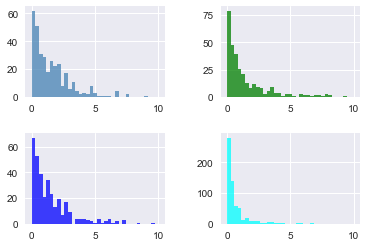

In [24]:
fig, ax = plt.subplots(2, 2)

fig.subplots_adjust(hspace=.4, wspace=.4)
kwargs = dict(bins=35, range=[0, 10], density=False, alpha=.75, histtype='stepfilled')
ax[0, 0].hist(euv171, **kwargs, color='steelblue', label='17.1 ferq');
ax[0, 1].hist(euv211, **kwargs, color='green', label='21.1 ferq');
ax[1, 0].hist(euv195, **kwargs, color='blue', label='19.4 ferq');
ax[1, 1].hist(euv304, **kwargs, color='cyan', label='30.4 ferq');

Depth Time, dimming in multiple channels 

In [25]:
flare_conversion = {"A": 1, "B": 10, "C": 100, "M": 1000, "X":10000}
flareClass = jedicdaw_condensed.filter(regex='GOES Flare Class').values

In [26]:
flare_conversion

{'A': 1, 'B': 10, 'C': 100, 'M': 1000, 'X': 10000}

In [27]:
flareClass.flatten()

array(['M1.2', 'M2.0', 'C1.0', ..., 'C1.9', 'C2.1', 'C1.0'], dtype=object)

In [28]:
flare_converted = []
for k in range(len(flareClass)):
    for i, v in flare_conversion.items():
        tempString = flareClass[k, 0]
        if tempString[:1] == i:
            flare_converted.append(round((float(tempString[1:]) * v)))

In [29]:
flare_converted_arr = np.array(flare_converted)

In [30]:
jedicdaw_condensed.insert(4, 'Flare Class Converted', flare_converted_arr)


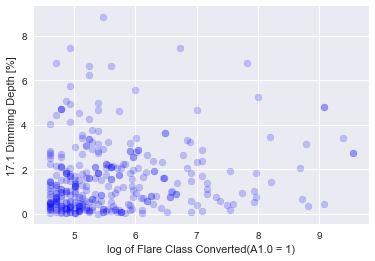

In [31]:
plt.scatter(np.log(jedicdaw_condensed.loc[:, 'Flare Class Converted']),jedicdaw_condensed.loc[:, '17.1 Depth [%]'],
            color='blue', alpha=.2);
# plt.scatter(np.log(jedicdaw_condensed.loc[:, 'Flare Class Converted']),jedicdaw_condensed.loc[:, '21.1 Depth [%]'],
#             color='red', alpha = .2);
# plt.scatter(np.log(jedicdaw_condensed.loc[:, 'Flare Class Converted']),jedicdaw_condensed.loc[:, '19.5 Depth [%]'],
#             color='green', alpha = .2);
# plt.scatter(np.log(jedicdaw_condensed.loc[:, 'Flare Class Converted']),jedicdaw_condensed.loc[:, '30.4 Depth [%]'],
#             color='cyan', alpha = .2);
plt.xlabel('log of Flare Class Converted(A1.0 = 1)');
plt.ylabel('17.1 Dimming Depth [%]');

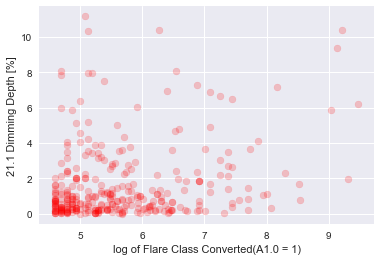

In [32]:
plt.scatter(np.log(jedicdaw_condensed.loc[:, 'Flare Class Converted']),jedicdaw_condensed.loc[:, '21.1 Depth [%]'],
            color='red', alpha = .2);

plt.xlabel('log of Flare Class Converted(A1.0 = 1)');
plt.ylabel('21.1 Dimming Depth [%]');

In [453]:
nonan_for_ML = jedicdaw_condensed[['21.1 Depth [%]', 'Flare Class Converted']].T.dropna(axis=1)

In [454]:
nonan_for_ML.T.head()

,21.1 Depth [%],Flare Class Converted
GOES Flare Peak Time,,
2010-07-14 12:30:00,2.042699,140.0
2010-08-01 08:26:00,1.575178,320.0
2010-08-14 10:05:00,0.078367,440.0
2010-09-28 22:11:00,0.220382,200.0
2010-09-28 22:11:00,0.220382,200.0


In [456]:
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures, Imputer
poly_model = make_pipeline(PolynomialFeatures(5), LinearRegression())
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

# imp = Imputer(strategy='most_frequent')
# X = imp.fit_transform(jedicdaw_condensed.loc[:, '19.5 Depth [%]'][:, np.newaxis])
#X = jedicdaw_condensed.loc[:, '19.5 Depth [%]'][:, np.newaxis]
#y = jedicdaw_condensed.loc[:, 'Flare Class Converted']
X = nonan_for_ML.T.loc[:, '21.1 Depth [%]'][:, np.newaxis]
y = nonan_for_ML.T.loc[:, 'Flare Class Converted']
X1, X2, y1, y2 = train_test_split(X, y, train_size = .5)

In [457]:

model = make_pipeline(PolynomialFeatures(3), RANSACRegressor())
model.fit(X1, y1)

y2_model = model.predict(X2)

# inlier_mask = ransac.inlier_mask_
# outlier_mask = np.logical_not(inlier_mask)

Text(0,0.5,'log of Flare Class Converted')

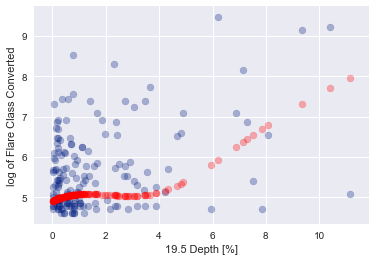

In [498]:
model = make_pipeline(PolynomialFeatures(3), RANSACRegressor())
model.fit(X1, y1)

y2_model = model.predict(X2)

# inlier_mask = ransac.inlier_mask_
# outlier_mask = np.logical_not(inlier_mask)

plt.scatter(X2, np.log(y2), alpha=.3)
plt.scatter(X2, np.log(y2_model), alpha=.3, color='red')
plt.xlabel('21.1 Depth [%]')
plt.ylabel('log of Flare Class Converted')

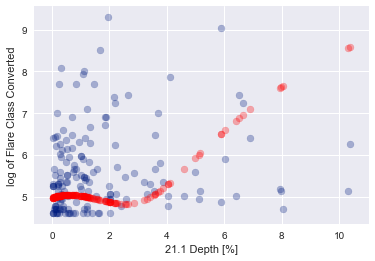

In [502]:
model = make_pipeline(PolynomialFeatures(3), RANSACRegressor())
model.fit(X2, y2)

y1_model = model.predict(X1)

# inlier_mask = ransac.inlier_mask_
# outlier_mask = np.logical_not(inlier_mask)
model.score(X1, y1_model)
plt.scatter(X1, np.log(y1), alpha=.3)
plt.scatter(X1, np.log(y1_model), alpha=.3, color='red')
plt.xlabel('21.1 Depth [%]')
plt.ylabel('log of Flare Class Converted');

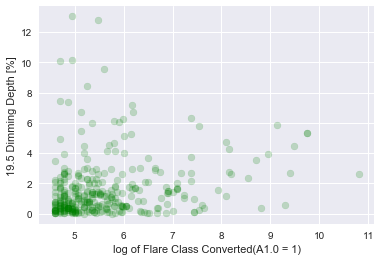

In [59]:
plt.scatter(np.log(jedicdaw_condensed.loc[:, 'Flare Class Converted']),(jedicdaw_condensed.loc[:, '19.5 Depth [%]']),
            color='green', alpha = .2);

plt.xlabel('log of Flare Class Converted(A1.0 = 1)');
plt.ylabel('19.5 Dimming Depth [%]');

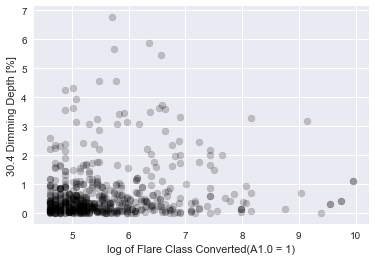

In [34]:
plt.scatter(np.log(jedicdaw_condensed.loc[:, 'Flare Class Converted']),jedicdaw_condensed.loc[:, '30.4 Depth [%]'],
            color='black', alpha = .2);

plt.xlabel('log of Flare Class Converted(A1.0 = 1)');
plt.ylabel('30.4 Dimming Depth [%]');

In [35]:
jedicdaw_condensed.index = pd.DatetimeIndex(jedicdaw_condensed['GOES Flare Peak Time'])
jedicdaw.index = pd.DatetimeIndex(jedicdaw['GOES Flare Peak Time'])

In [36]:
jedicdaw_condensed['2012-03-07'] #2012-03-07 00:02 03:08 5389


,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Flare Class Converted,GOES Latitude,GOES Longitude,GOES Converted Position Angle [º],Pre-Flare Start Time,Pre-Flare End Time,...,21.1 Depth [%],17.1 Depth Time,19.5 Depth Time,30.4 Depth Time,21.1 Depth Time,Has CME,Matching CME time to time of,CME Time,CME Speed [km/s],CME Mass [g]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,
2012-03-07 01:14:00,1589.0,2012-03-07 01:05:00.000,2012-03-07 01:14:00.000,X1.3,13000,22.0,-12.0,28.61046,2012-02-26 03:25:00.000,2012-02-26 11:25:00.000,...,6.196323,NaN,NaN,NaN,2012-03-07 03:00:13,False,Dimming,NaN,NaN,NaN
2012-03-07 01:14:00,1589.0,2012-03-07 01:05:00.000,2012-03-07 01:14:00.000,X1.3,13000,22.0,-12.0,28.61046,2012-03-03 10:03:00.000,2012-03-03 18:03:00.000,...,NaN,NaN,2012-03-07 01:25:13,NaN,NaN,False,Dimming,NaN,NaN,NaN


In [37]:
jedicdaw_condensed['2014-01-07']#2014-01-07 17:54 22:06  6524


,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Flare Class Converted,GOES Latitude,GOES Longitude,GOES Converted Position Angle [º],Pre-Flare Start Time,Pre-Flare End Time,...,21.1 Depth [%],17.1 Depth Time,19.5 Depth Time,30.4 Depth Time,21.1 Depth Time,Has CME,Matching CME time to time of,CME Time,CME Speed [km/s],CME Mass [g]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,
2014-01-07 18:32:00,4400.0,2014-01-07 18:04:00.000,2014-01-07 18:32:00.000,X1.2,12000,NaN,NaN,NaN,2014-01-06 18:34:00.000,2014-01-07 02:34:00.000,...,NaN,2014-01-07 21:57:14,2014-01-07 21:40:14,NaN,NaN,False,Dimming,NaN,NaN,NaN


In [38]:
jedicdaw_condensed['2012-11-20']#2012-11-20 10:20 13:54 6165

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Flare Class Converted,GOES Latitude,GOES Longitude,GOES Converted Position Angle [º],Pre-Flare Start Time,Pre-Flare End Time,...,21.1 Depth [%],17.1 Depth Time,19.5 Depth Time,30.4 Depth Time,21.1 Depth Time,Has CME,Matching CME time to time of,CME Time,CME Speed [km/s],CME Mass [g]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,
2012-11-20 06:33:00,2770.0,2012-11-20 06:25:00.000,2012-11-20 06:33:00.000,C3.9,390,9.0,-22.0,67.750977,2012-11-19 18:07:00.000,2012-11-20 02:07:00.000,...,NaN,NaN,2012-11-20 07:34:08,NaN,NaN,False,Dimming,NaN,NaN,NaN
2012-11-20 15:29:00,2773.0,2012-11-20 15:18:00.000,2012-11-20 15:29:00.000,C3.1,310,8.0,-19.0,67.166347,2012-11-19 18:07:00.000,2012-11-20 02:07:00.000,...,NaN,NaN,2012-11-20 15:34:08,NaN,NaN,False,Dimming,NaN,NaN,NaN
2012-11-20 19:28:00,2774.0,2012-11-20 19:21:00.000,2012-11-20 19:28:00.000,M1.6,1600,7.0,-15.0,64.983108,2012-11-19 18:07:00.000,2012-11-20 02:07:00.000,...,NaN,NaN,2012-11-20 21:30:08,2012-11-20 22:25:08,NaN,2,Dimming,2012-11-20 22:55:09.000,205.0,9.200000e+14
2012-11-20 23:07:00,2775.0,2012-11-20 22:52:00.000,2012-11-20 23:07:00.000,C3.9,390,NaN,NaN,NaN,2012-11-19 18:07:00.000,2012-11-20 02:07:00.000,...,NaN,NaN,2012-11-20 23:39:08,2012-11-20 23:07:08,NaN,False,Dimming,NaN,NaN,NaN


In [39]:
jedicdaw_condensed['2011-10-01']#2011-10-01 08:54 13:10 4859

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Flare Class Converted,GOES Latitude,GOES Longitude,GOES Converted Position Angle [º],Pre-Flare Start Time,Pre-Flare End Time,...,21.1 Depth [%],17.1 Depth Time,19.5 Depth Time,30.4 Depth Time,21.1 Depth Time,Has CME,Matching CME time to time of,CME Time,CME Speed [km/s],CME Mass [g]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,
2011-10-01 04:50:00,951.0,2011-10-01 04:44:00.000,2011-10-01 04:50:00.000,C4.1,410,NaN,NaN,NaN,2011-09-30 10:47:00.000,2011-09-30 18:47:00.000,...,NaN,NaN,NaN,2011-10-01 06:01:10,NaN,False,Dimming,NaN,NaN,NaN
2011-10-01 12:39:00,953.0,2011-10-01 12:35:00.000,2011-10-01 12:39:00.000,C1.0,100,10.0,39.0,284.381393,2011-09-30 10:47:00.000,2011-09-30 18:47:00.000,...,NaN,NaN,NaN,2011-10-01 20:00:10,NaN,False,Dimming,NaN,NaN,NaN


In [40]:
jedicdaw_condensed['2013-04-11']#2013-04-11 06:44 08:44 6809

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Flare Class Converted,GOES Latitude,GOES Longitude,GOES Converted Position Angle [º],Pre-Flare Start Time,Pre-Flare End Time,...,21.1 Depth [%],17.1 Depth Time,19.5 Depth Time,30.4 Depth Time,21.1 Depth Time,Has CME,Matching CME time to time of,CME Time,CME Speed [km/s],CME Mass [g]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,
2013-04-11 00:28:00,3115.0,2013-04-11 00:19:00.000,2013-04-11 00:28:00.000,C1.4,140,NaN,NaN,NaN,2013-04-08 07:50:00.000,2013-04-08 15:50:00.000,...,NaN,2013-04-11 02:21:06,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN
2013-04-11 07:16:00,3116.0,2013-04-11 06:55:00.000,2013-04-11 07:16:00.000,M6.5,6500,9.0,-12.0,53.130103,2013-04-08 07:50:00.000,2013-04-08 15:50:00.000,...,NaN,2013-04-11 07:17:06,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN
2013-04-11 12:47:00,3119.0,2013-04-11 12:41:00.000,2013-04-11 12:47:00.000,C2.2,220,20.0,26.0,307.568591,2013-04-08 07:50:00.000,2013-04-08 15:50:00.000,...,NaN,2013-04-11 14:01:06,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN
2013-04-11 16:55:00,3121.0,2013-04-11 16:52:00.000,2013-04-11 16:55:00.000,C1.0,100,21.0,27.0,307.874983,2013-04-08 07:50:00.000,2013-04-08 15:50:00.000,...,NaN,2013-04-11 17:14:06,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN
2013-04-11 23:02:00,3122.0,2013-04-11 22:49:00.000,2013-04-11 23:02:00.000,C4.0,400,NaN,NaN,NaN,2013-04-08 07:50:00.000,2013-04-08 15:50:00.000,...,NaN,2013-04-11 23:59:06,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN


In [41]:
jedicdaw['2011-11-09'] #2011-11-09 11:28 15:46 4991

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,GOES Latitude,GOES Longitude,GOES Converted Position Angle [º],Pre-Flare Start Time,Pre-Flare End Time,Flare Interrupt,...,103.2 by 83.6 Fitting Score,103.2 by 95.0 Fitting Score,103.2 by 97.3 Fitting Score,103.2 by 97.7 Fitting Score,103.2 by 102.6 Fitting Score,Has CME,Matching CME time to time of,CME Time,CME Speed [km/s],CME Mass [g]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,
2011-11-09 02:19:00,1143.0,2011-11-09 01:43:00.000,2011-11-09 02:19:00.000,C1.9,NaN,NaN,NaN,2011-11-08 11:28:00.000,2011-11-08 19:28:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN
2011-11-09 13:35:00,1144.0,2011-11-09 13:04:00.000,2011-11-09 13:35:00.000,M1.1,NaN,NaN,NaN,2011-11-09 05:35:00.000,2011-11-09 13:35:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN


In [42]:
jedicdaw['2012-08-31']#2012-08-31 18:56  03:06 5964

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,GOES Latitude,GOES Longitude,GOES Converted Position Angle [º],Pre-Flare Start Time,Pre-Flare End Time,Flare Interrupt,...,103.2 by 83.6 Fitting Score,103.2 by 95.0 Fitting Score,103.2 by 97.3 Fitting Score,103.2 by 97.7 Fitting Score,103.2 by 102.6 Fitting Score,Has CME,Matching CME time to time of,CME Time,CME Speed [km/s],CME Mass [g]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,
2012-08-31 04:12:00,2455.0,2012-08-31 04:08:00.000,2012-08-31 04:12:00.000,C1.5,3.0,-20.0,81.469236,2012-08-29 05:54:00.000,2012-08-29 13:54:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Flare,NaN,NaN,NaN
2012-08-31 04:51:00,2456.0,2012-08-31 04:46:00.000,2012-08-31 04:51:00.000,C1.7,-26.0,-67.0,111.209225,2012-08-29 05:54:00.000,2012-08-29 13:54:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Flare,NaN,NaN,NaN
2012-08-31 07:21:00,2457.0,2012-08-31 07:13:00.000,2012-08-31 07:21:00.000,C2.9,5.0,-22.0,77.195735,2012-08-29 05:54:00.000,2012-08-29 13:54:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Flare,NaN,NaN,NaN
2012-08-31 10:04:00,2458.0,2012-08-31 09:04:00.000,2012-08-31 10:04:00.000,C1.9,5.0,-21.0,76.607504,2012-08-29 05:54:00.000,2012-08-29 13:54:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Flare,NaN,NaN,NaN
2012-08-31 11:27:00,2459.0,2012-08-31 11:23:00.000,2012-08-31 11:27:00.000,C1.3,-21.0,-63.0,108.434948,2012-08-29 05:54:00.000,2012-08-29 13:54:00.000,True,...,NaN,NaN,NaN,NaN,NaN,True,Flare,2012-08-31 11:12:05.000,706.0,6.900000e+14
2012-08-31 14:14:00,2460.0,2012-08-31 14:06:00.000,2012-08-31 14:14:00.000,C2.2,NaN,NaN,NaN,2012-08-29 05:54:00.000,2012-08-29 13:54:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Flare,NaN,NaN,NaN
2012-08-31 16:12:00,2461.0,2012-08-31 16:05:00.000,2012-08-31 16:12:00.000,C2.1,NaN,NaN,NaN,2012-08-29 05:54:00.000,2012-08-29 13:54:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN
2012-08-31 20:43:00,2462.0,2012-08-31 19:45:00.000,2012-08-31 20:43:00.000,C8.4,-19.0,-42.0,114.341089,2012-08-29 05:54:00.000,2012-08-29 13:54:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Flare,NaN,NaN,NaN


In [43]:
jedicdaw_condensed['2012-07-12']#2012-07-12 15:58 18:28  5841

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Flare Class Converted,GOES Latitude,GOES Longitude,GOES Converted Position Angle [º],Pre-Flare Start Time,Pre-Flare End Time,...,21.1 Depth [%],17.1 Depth Time,19.5 Depth Time,30.4 Depth Time,21.1 Depth Time,Has CME,Matching CME time to time of,CME Time,CME Speed [km/s],CME Mass [g]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,
2012-07-12 16:49:00,2244.0,2012-07-12 15:37:00.000,2012-07-12 16:49:00.000,X1.4,14000,-15.0,1.0,183.814075,2012-07-12 08:49:00.000,2012-07-12 16:49:00.000,...,NaN,2012-07-12 18:11:05,NaN,2012-07-13 00:11:05,NaN,False,Dimming,NaN,NaN,NaN
2012-07-12 16:49:00,2244.0,2012-07-12 15:37:00.000,2012-07-12 16:49:00.000,X1.4,14000,-15.0,1.0,183.814075,2012-07-12 08:49:00.000,2012-07-12 16:49:00.000,...,NaN,2012-07-12 18:11:05,NaN,2012-07-13 00:11:05,NaN,False,Dimming,NaN,NaN,NaN


In [44]:
jedicdaw['2013-10-28']#2013-10-28 14:16 16:48 7800

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,GOES Latitude,GOES Longitude,GOES Converted Position Angle [º],Pre-Flare Start Time,Pre-Flare End Time,Flare Interrupt,...,103.2 by 83.6 Fitting Score,103.2 by 95.0 Fitting Score,103.2 by 97.3 Fitting Score,103.2 by 97.7 Fitting Score,103.2 by 102.6 Fitting Score,Has CME,Matching CME time to time of,CME Time,CME Speed [km/s],CME Mass [g]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,
2013-10-28 01:30:00,3901.0,2013-10-28 01:25:00.000,2013-10-28 01:30:00.000,C3.5,4.0,59.0,273.878523,2013-10-20 23:14:00.000,2013-10-21 07:14:00.000,True,...,NaN,NaN,NaN,NaN,NaN,5,Flare,2013-10-27 23:36:07.000,483.0,3.500000e+14
2013-10-28 02:03:00,3902.0,2013-10-28 01:41:00.000,2013-10-28 02:03:00.000,X1.0,4.0,66.0,273.468228,2013-10-20 23:14:00.000,2013-10-21 07:14:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Flare,NaN,NaN,NaN
2013-10-28 04:41:00,3903.0,2013-10-28 04:32:00.000,2013-10-28 04:41:00.000,M5.1,8.0,71.0,276.428746,2013-10-20 23:14:00.000,2013-10-21 07:14:00.000,True,...,NaN,NaN,NaN,NaN,NaN,3,Dimming,2013-10-28 04:48:05.000,1201.0,NaN
2013-10-28 09:22:00,3904.0,2013-10-28 09:15:00.000,2013-10-28 09:22:00.000,C5.2,8.0,72.0,276.340190,2013-10-20 23:14:00.000,2013-10-21 07:14:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN
2013-10-28 11:53:00,3905.0,2013-10-28 11:32:00.000,2013-10-28 11:53:00.000,M1.4,-16.0,44.0,250.016895,2013-10-20 23:14:00.000,2013-10-21 07:14:00.000,True,...,NaN,NaN,NaN,NaN,NaN,6,Dimming,2013-10-28 12:12:05.000,681.0,1.700000e+14
2013-10-28 14:05:00,3906.0,2013-10-28 14:00:00.000,2013-10-28 14:05:00.000,M2.8,NaN,NaN,NaN,2013-10-20 23:14:00.000,2013-10-21 07:14:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Flare,NaN,NaN,NaN
2013-10-28 15:01:00,3907.0,2013-10-28 14:46:00.000,2013-10-28 15:01:00.000,M2.7,NaN,NaN,NaN,2013-10-20 23:14:00.000,2013-10-21 07:14:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Flare,NaN,NaN,NaN
2013-10-28 15:15:00,3908.0,2013-10-28 15:07:00.000,2013-10-28 15:15:00.000,M4.4,NaN,NaN,NaN,2013-10-20 23:14:00.000,2013-10-21 07:14:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN
2013-10-28 20:57:00,3909.0,2013-10-28 20:48:00.000,2013-10-28 20:57:00.000,M1.5,NaN,NaN,NaN,2013-10-20 23:14:00.000,2013-10-21 07:14:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Flare,NaN,NaN,NaN


In [45]:
jedicdaw_condensed['2012-09-27']#2012-09-27 23:10 01:32 6029

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Flare Class Converted,GOES Latitude,GOES Longitude,GOES Converted Position Angle [º],Pre-Flare Start Time,Pre-Flare End Time,...,21.1 Depth [%],17.1 Depth Time,19.5 Depth Time,30.4 Depth Time,21.1 Depth Time,Has CME,Matching CME time to time of,CME Time,CME Speed [km/s],CME Mass [g]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,
2012-09-27 17:20:00,2559.0,2012-09-27 17:04:00.000,2012-09-27 17:20:00.000,C4.4,440,-18.0,-39.0,114.775139,2012-09-27 09:20:00.000,2012-09-27 17:20:00.000,...,NaN,2012-09-27 19:11:00,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN
2012-09-27 23:57:00,2560.0,2012-09-27 23:36:00.000,2012-09-27 23:57:00.000,C3.7,370,6.0,34.0,280.007978,2012-09-27 09:20:00.000,2012-09-27 17:20:00.000,...,NaN,2012-09-28 02:24:14,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN


In [46]:
jedicdaw_condensed['2013-09-29']#2013-09-29 21:06 22:52 7356

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Flare Class Converted,GOES Latitude,GOES Longitude,GOES Converted Position Angle [º],Pre-Flare Start Time,Pre-Flare End Time,...,21.1 Depth [%],17.1 Depth Time,19.5 Depth Time,30.4 Depth Time,21.1 Depth Time,Has CME,Matching CME time to time of,CME Time,CME Speed [km/s],CME Mass [g]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,
2013-09-29 01:27:00,3699.0,2013-09-29 00:39:00.000,2013-09-29 01:27:00.000,C1.6,160,NaN,NaN,NaN,2013-09-28 17:27:00.000,2013-09-29 01:27:00.000,...,NaN,2013-09-29 02:29:08,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN
2013-09-29 05:25:00,3700.0,2013-09-29 05:11:00.000,2013-09-29 05:25:00.000,C1.6,160,9.0,44.0,281.560129,2013-09-28 17:27:00.000,2013-09-29 01:27:00.000,...,NaN,2013-09-29 05:49:08,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN


In [47]:
jedicdaw['2011-04-03']#2011-04-03  6:28  6:56  4545

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,GOES Latitude,GOES Longitude,GOES Converted Position Angle [º],Pre-Flare Start Time,Pre-Flare End Time,Flare Interrupt,...,103.2 by 83.6 Fitting Score,103.2 by 95.0 Fitting Score,103.2 by 97.3 Fitting Score,103.2 by 97.7 Fitting Score,103.2 by 102.6 Fitting Score,Has CME,Matching CME time to time of,CME Time,CME Speed [km/s],CME Mass [g]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,
2011-04-03 05:19:00,409.0,2011-04-03 05:01:00.000,2011-04-03 05:19:00.000,C1.2,NaN,NaN,NaN,2011-04-02 21:19:00.000,2011-04-03 05:19:00.000,False,...,NaN,NaN,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN


In [48]:
jedicdaw_condensed['2011-06-07']#2011-06-07 6:22 10:12 4633

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Flare Class Converted,GOES Latitude,GOES Longitude,GOES Converted Position Angle [º],Pre-Flare Start Time,Pre-Flare End Time,...,21.1 Depth [%],17.1 Depth Time,19.5 Depth Time,30.4 Depth Time,21.1 Depth Time,Has CME,Matching CME time to time of,CME Time,CME Speed [km/s],CME Mass [g]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,
2011-06-07 06:41:00,583.0,2011-06-07 06:16:00.000,2011-06-07 06:41:00.000,M2.5,2500,-21.0,54.0,248.749496,2011-06-06 22:41:00.000,2011-06-07 06:41:00.000,...,NaN,2011-06-07 07:06:12,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN


In [49]:
jedicdaw_condensed['2012-03-07'] #2012-03-07 00:18 3:08 5389

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Flare Class Converted,GOES Latitude,GOES Longitude,GOES Converted Position Angle [º],Pre-Flare Start Time,Pre-Flare End Time,...,21.1 Depth [%],17.1 Depth Time,19.5 Depth Time,30.4 Depth Time,21.1 Depth Time,Has CME,Matching CME time to time of,CME Time,CME Speed [km/s],CME Mass [g]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,
2012-03-07 01:14:00,1589.0,2012-03-07 01:05:00.000,2012-03-07 01:14:00.000,X1.3,13000,22.0,-12.0,28.61046,2012-02-26 03:25:00.000,2012-02-26 11:25:00.000,...,6.196323,NaN,NaN,NaN,2012-03-07 03:00:13,False,Dimming,NaN,NaN,NaN
2012-03-07 01:14:00,1589.0,2012-03-07 01:05:00.000,2012-03-07 01:14:00.000,X1.3,13000,22.0,-12.0,28.61046,2012-03-03 10:03:00.000,2012-03-03 18:03:00.000,...,NaN,NaN,2012-03-07 01:25:13,NaN,NaN,False,Dimming,NaN,NaN,NaN


In [50]:
jedicdaw_condensed['2012-01-19'].filter(like='Depth') #2012-01-19 14:06 16:14 5317


,19.5 Depth [%],17.1 Depth [%],30.4 Depth [%],21.1 Depth [%],17.1 Depth Time,19.5 Depth Time,30.4 Depth Time,21.1 Depth Time
GOES Flare Peak Time,,,,,,,,
2012-01-19 03:55:00,2.64122,NaN,0.840378,2.409699,NaN,2012-01-19 04:31:10,2012-01-19 04:06:10,2012-01-19 04:01:10
2012-01-19 03:55:00,2.64122,NaN,0.840378,2.409699,NaN,2012-01-19 04:31:10,2012-01-19 04:06:10,2012-01-19 04:01:10
2012-01-19 12:50:00,NaN,0.090495,NaN,NaN,2012-01-19 14:02:10,NaN,NaN,NaN
2012-01-19 12:50:00,NaN,0.090495,NaN,NaN,2012-01-19 14:02:10,NaN,NaN,NaN
2012-01-19 12:50:00,NaN,0.090495,NaN,NaN,2012-01-19 14:02:10,NaN,NaN,NaN


In [51]:
jedicdaw_condensed['2012-01-27'] #2012-01-27 18:06 20:08 5333


,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Flare Class Converted,GOES Latitude,GOES Longitude,GOES Converted Position Angle [º],Pre-Flare Start Time,Pre-Flare End Time,...,21.1 Depth [%],17.1 Depth Time,19.5 Depth Time,30.4 Depth Time,21.1 Depth Time,Has CME,Matching CME time to time of,CME Time,CME Speed [km/s],CME Mass [g]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,
2012-01-27 01:24:00,1499.0,2012-01-27 01:11:00.000,2012-01-27 01:24:00.000,C1.7,170,NaN,NaN,NaN,2012-01-26 12:44:00.000,2012-01-26 20:44:00.000,...,NaN,NaN,NaN,2012-01-27 03:06:12,NaN,False,Dimming,NaN,NaN,NaN
2012-01-27 01:24:00,1499.0,2012-01-27 01:11:00.000,2012-01-27 01:24:00.000,C1.7,170,NaN,NaN,NaN,2012-01-26 12:44:00.000,2012-01-26 20:44:00.000,...,NaN,NaN,NaN,2012-01-27 03:06:12,NaN,False,Dimming,NaN,NaN,NaN
2012-01-27 04:10:00,1500.0,2012-01-27 04:01:00.000,2012-01-27 04:10:00.000,C2.1,210,NaN,NaN,NaN,2012-01-26 12:44:00.000,2012-01-26 20:44:00.000,...,NaN,NaN,2012-01-27 05:21:12,2012-01-27 05:06:12,NaN,False,Dimming,NaN,NaN,NaN
2012-01-27 04:10:00,1500.0,2012-01-27 04:01:00.000,2012-01-27 04:10:00.000,C2.1,210,NaN,NaN,NaN,2012-01-26 12:44:00.000,2012-01-26 20:44:00.000,...,NaN,NaN,2012-01-27 05:21:12,2012-01-27 05:06:12,NaN,False,Dimming,NaN,NaN,NaN
2012-01-27 06:42:00,1501.0,2012-01-27 06:24:00.000,2012-01-27 06:42:00.000,C5.5,550,31.0,74.0,292.729731,2012-01-26 12:44:00.000,2012-01-26 20:44:00.000,...,NaN,NaN,NaN,2012-01-27 07:08:12,NaN,False,Dimming,NaN,NaN,NaN
2012-01-27 06:42:00,1501.0,2012-01-27 06:24:00.000,2012-01-27 06:42:00.000,C5.5,550,31.0,74.0,292.729731,2012-01-26 12:44:00.000,2012-01-26 20:44:00.000,...,NaN,NaN,NaN,2012-01-27 07:08:12,NaN,False,Dimming,NaN,NaN,NaN
2012-01-27 13:05:00,1503.0,2012-01-27 13:02:00.000,2012-01-27 13:05:00.000,C1.0,100,NaN,NaN,NaN,2012-01-26 12:44:00.000,2012-01-26 20:44:00.000,...,NaN,NaN,2012-01-27 16:15:12,2012-01-27 13:18:12,NaN,False,Dimming,NaN,NaN,NaN
2012-01-27 13:05:00,1503.0,2012-01-27 13:02:00.000,2012-01-27 13:05:00.000,C1.0,100,NaN,NaN,NaN,2012-01-26 12:44:00.000,2012-01-26 20:44:00.000,...,NaN,NaN,2012-01-27 16:15:12,2012-01-27 13:18:12,NaN,False,Dimming,NaN,NaN,NaN
2012-01-27 18:37:00,1504.0,2012-01-27 17:37:00.000,2012-01-27 18:37:00.000,X1.7,17000,27.0,71.0,290.820892,2012-01-26 12:44:00.000,2012-01-26 20:44:00.000,...,NaN,NaN,2012-01-27 20:32:12,2012-01-28 00:34:12,NaN,False,Dimming,NaN,NaN,NaN


In [52]:
jedicdaw_condensed['2012-11-20']#2012-11-20 10:36 13:54 6165

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Flare Class Converted,GOES Latitude,GOES Longitude,GOES Converted Position Angle [º],Pre-Flare Start Time,Pre-Flare End Time,...,21.1 Depth [%],17.1 Depth Time,19.5 Depth Time,30.4 Depth Time,21.1 Depth Time,Has CME,Matching CME time to time of,CME Time,CME Speed [km/s],CME Mass [g]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,
2012-11-20 06:33:00,2770.0,2012-11-20 06:25:00.000,2012-11-20 06:33:00.000,C3.9,390,9.0,-22.0,67.750977,2012-11-19 18:07:00.000,2012-11-20 02:07:00.000,...,NaN,NaN,2012-11-20 07:34:08,NaN,NaN,False,Dimming,NaN,NaN,NaN
2012-11-20 15:29:00,2773.0,2012-11-20 15:18:00.000,2012-11-20 15:29:00.000,C3.1,310,8.0,-19.0,67.166347,2012-11-19 18:07:00.000,2012-11-20 02:07:00.000,...,NaN,NaN,2012-11-20 15:34:08,NaN,NaN,False,Dimming,NaN,NaN,NaN
2012-11-20 19:28:00,2774.0,2012-11-20 19:21:00.000,2012-11-20 19:28:00.000,M1.6,1600,7.0,-15.0,64.983108,2012-11-19 18:07:00.000,2012-11-20 02:07:00.000,...,NaN,NaN,2012-11-20 21:30:08,2012-11-20 22:25:08,NaN,2,Dimming,2012-11-20 22:55:09.000,205.0,9.200000e+14
2012-11-20 23:07:00,2775.0,2012-11-20 22:52:00.000,2012-11-20 23:07:00.000,C3.9,390,NaN,NaN,NaN,2012-11-19 18:07:00.000,2012-11-20 02:07:00.000,...,NaN,NaN,2012-11-20 23:39:08,2012-11-20 23:07:08,NaN,False,Dimming,NaN,NaN,NaN


In [53]:
jedicdaw_condensed['2014-02-25']#2014-02-25 00:50 02:12 7153


,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Flare Class Converted,GOES Latitude,GOES Longitude,GOES Converted Position Angle [º],Pre-Flare Start Time,Pre-Flare End Time,...,21.1 Depth [%],17.1 Depth Time,19.5 Depth Time,30.4 Depth Time,21.1 Depth Time,Has CME,Matching CME time to time of,CME Time,CME Speed [km/s],CME Mass [g]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,
2014-02-25 00:49:00,4720.0,2014-02-25 00:39:00.000,2014-02-25 00:49:00.000,X4.9,49000,-12.0,-82.0,98.325649,2014-02-22 22:10:00.000,2014-02-23 06:10:00.000,...,NaN,NaN,2014-02-25 01:25:06,NaN,NaN,False,Dimming,NaN,NaN,NaN
2014-02-25 06:20:00,4722.0,2014-02-25 06:16:00.000,2014-02-25 06:20:00.000,C4.5,450,12.0,-8.0,33.690068,2014-02-22 22:10:00.000,2014-02-23 06:10:00.000,...,NaN,NaN,2014-02-25 06:39:06,NaN,NaN,False,Dimming,NaN,NaN,NaN


In [54]:
jedicdaw_condensed['2012-01-23'] #2012-01-23 02:10 05:00 5326


,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Flare Class Converted,GOES Latitude,GOES Longitude,GOES Converted Position Angle [º],Pre-Flare Start Time,Pre-Flare End Time,...,21.1 Depth [%],17.1 Depth Time,19.5 Depth Time,30.4 Depth Time,21.1 Depth Time,Has CME,Matching CME time to time of,CME Time,CME Speed [km/s],CME Mass [g]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,
2012-01-23 03:59:00,1487.0,2012-01-23 03:38:00.000,2012-01-23 03:59:00.000,M8.7,8700,28.0,21.0,323.130102,2012-01-21 05:42:00.000,2012-01-21 13:42:00.000,...,NaN,2012-01-23 05:55:11,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN
2012-01-23 03:59:00,1487.0,2012-01-23 03:38:00.000,2012-01-23 03:59:00.000,M8.7,8700,28.0,21.0,323.130102,2012-01-21 05:42:00.000,2012-01-21 13:42:00.000,...,NaN,2012-01-23 05:55:11,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN
2012-01-23 03:59:00,1487.0,2012-01-23 03:38:00.000,2012-01-23 03:59:00.000,M8.7,8700,28.0,21.0,323.130102,2012-01-19 04:50:00.000,2012-01-19 12:50:00.000,...,NaN,2012-01-23 05:54:11,NaN,NaN,NaN,False,Dimming,NaN,NaN,NaN
2012-01-23 20:11:00,1488.0,2012-01-23 19:40:00.000,2012-01-23 20:11:00.000,C1.4,140,18.0,33.0,298.610459,2012-01-23 12:11:00.000,2012-01-23 20:11:00.000,...,0.300552,NaN,NaN,2012-01-23 21:36:11,2012-01-24 00:47:11,False,Dimming,NaN,NaN,NaN
2012-01-23 20:11:00,1488.0,2012-01-23 19:40:00.000,2012-01-23 20:11:00.000,C1.4,140,18.0,33.0,298.610459,2012-01-23 12:11:00.000,2012-01-23 20:11:00.000,...,0.300552,NaN,NaN,2012-01-23 21:36:11,2012-01-24 00:47:11,False,Dimming,NaN,NaN,NaN


In [55]:
jedicdaw_condensed['2014-01-07'] #2014-01-07 18:10 22:06 6524


,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Flare Class Converted,GOES Latitude,GOES Longitude,GOES Converted Position Angle [º],Pre-Flare Start Time,Pre-Flare End Time,...,21.1 Depth [%],17.1 Depth Time,19.5 Depth Time,30.4 Depth Time,21.1 Depth Time,Has CME,Matching CME time to time of,CME Time,CME Speed [km/s],CME Mass [g]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,
2014-01-07 18:32:00,4400.0,2014-01-07 18:04:00.000,2014-01-07 18:32:00.000,X1.2,12000,NaN,NaN,NaN,2014-01-06 18:34:00.000,2014-01-07 02:34:00.000,...,NaN,2014-01-07 21:57:14,2014-01-07 21:40:14,NaN,NaN,False,Dimming,NaN,NaN,NaN


In [56]:
jedicdaw['2013-12-12']#2013-12-12 05:06 07:54 8372


,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,GOES Latitude,GOES Longitude,GOES Converted Position Angle [º],Pre-Flare Start Time,Pre-Flare End Time,Flare Interrupt,...,103.2 by 83.6 Fitting Score,103.2 by 95.0 Fitting Score,103.2 by 97.3 Fitting Score,103.2 by 97.7 Fitting Score,103.2 by 102.6 Fitting Score,Has CME,Matching CME time to time of,CME Time,CME Speed [km/s],CME Mass [g]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,
2013-12-12 03:36:00,4216.0,2013-12-12 03:11:00.000,2013-12-12 03:36:00.000,C4.6,-23.0,46.0,243.434950,2013-12-11 03:53:00.000,2013-12-11 11:53:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Flare,NaN,NaN,NaN
2013-12-12 06:59:00,4217.0,2013-12-12 06:38:00.000,2013-12-12 06:59:00.000,C3.4,NaN,NaN,NaN,2013-12-11 03:53:00.000,2013-12-11 11:53:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Flare,NaN,NaN,NaN
2013-12-12 11:39:00,4218.0,2013-12-12 11:32:00.000,2013-12-12 11:39:00.000,C2.3,NaN,NaN,NaN,2013-12-11 03:53:00.000,2013-12-11 11:53:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Flare,NaN,NaN,NaN
2013-12-12 16:43:00,4219.0,2013-12-12 16:36:00.000,2013-12-12 16:43:00.000,C2.6,NaN,NaN,NaN,2013-12-11 03:53:00.000,2013-12-11 11:53:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Flare,NaN,NaN,NaN
2013-12-12 19:34:00,4220.0,2013-12-12 19:30:00.000,2013-12-12 19:34:00.000,C1.6,NaN,NaN,NaN,2013-12-11 03:53:00.000,2013-12-11 11:53:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Flare,NaN,NaN,NaN
2013-12-12 22:14:00,4221.0,2013-12-12 22:05:00.000,2013-12-12 22:14:00.000,C5.9,10.0,-38.0,75.256438,2013-12-11 03:53:00.000,2013-12-11 11:53:00.000,True,...,NaN,NaN,NaN,NaN,NaN,False,Flare,NaN,NaN,NaN


In [57]:
num_of_duplicates = 0
event_num = jedicdaw.filter(regex='Event #').values
for i in range(len(event_num)):
    for k in range(len(event_num)):
        if i != k:
            if event_num[i] == event_num[k]:
                num_of_duplicates += 1
            
num_of_duplicates//2

374